In [1]:
import os
os.chdir("./Datasets")
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dbda.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Restaurant_Reviews

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
stops = stopwords.words('english')

## CountVectorizer

In [4]:
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
cv = CountVectorizer(max_features = 800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = dataset['Liked']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.20,  random_state = 24,  stratify=y)
classifier = RandomForestClassifier(random_state=24,n_estimators=25)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=24)

In [7]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.78


## TF-IDF Vectorization

What is Feature Engineering of text data?

The procedure of converting raw text data into machine understandable format(numbers) is called feature engineering of text data. Machine learning and deep learning algorithm performance and accuracy is fundamentally dependent on the type of feature engineering techniques used.

In this article, we are going to see Feature Engineering technique using TF-IDF and mathematical calculation of TF, IDF and TF-IDF. After reading this article you will understand the insights of mathematical logic behind libraries such as TfidfTransformer from sklearn.feature_extraction package in python.
TF (Term Frequency) :

    Term frequency is simply the count of a word present in a sentence
    TF is basically capturing the importance of the word irrespective of the length of the document.
    A word with the frequency of 3 with the length of sentence being 10 is not the same as when the word length of sentence being 100 words. It should get more importance in the first scenario; that is what TF does.

IDF (Inverse Document Frequency):

    IDF of each word is the log of the ratio of the total number of rows to the number of rows in a particular document in which that word is present.
    IDF will measure the rareness of a term. word like ‘a’ and ‘the’ show up in all the documents of corpus, but the rare words is not in all the documents.

TF-IDF:

It is the simplest product of TF and IDF so that both of the drawbacks are addressed above, which makes predictions and information retrieval relevant.

We are going to play with following corpus containing five documents as:

docs = ['the cat see the mouse',
      'the house has a tiny little mouse',
       'the mouse ran away from the house',
        'the cat finally ate the mouse',
       'the end of the mouse story'
       ]

[TF-IDF](https://medium.com/analytics-vidhya/demonstrating-calculation-of-tf-idf-from-sklearn-4f9526e7e78b)

![image](./tfidf1.webp)
![image](./tfidf2.webp)

In [8]:

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
cv = TfidfVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = dataset['Liked']

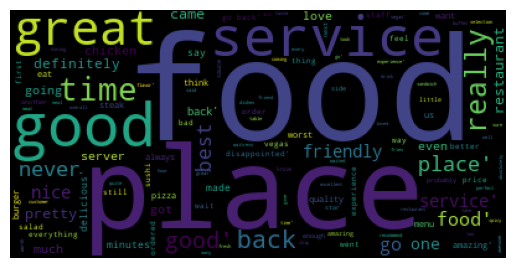

In [12]:
### Code for Word Cloud

corpus2 = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)
    
corp_str = str(corpus2)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()    


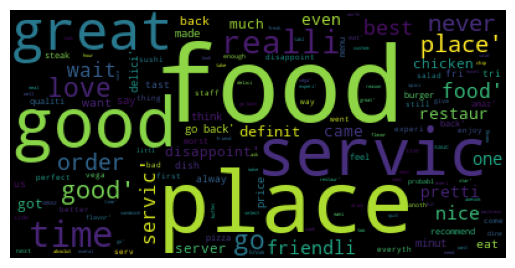

In [13]:
corp_str = str(corpus)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

# Spam dataset

In [14]:
dataset = pd.read_csv('../Cases/Spam Classification/SPAM Data.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
cv = TfidfVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = dataset['Category']

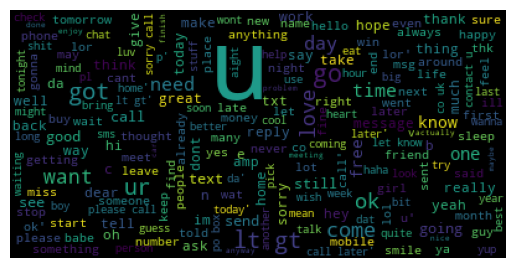

In [17]:
### Code for Word Cloud

corpus2 = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Message'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)
    
corp_str = str(corpus2)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()    


# Genshim Reviews

In [ ]:
################### Replacing Apostrophe to Word #################
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
###################################################################

corpus = []
for i in range(0, dataset.shape[0]):
    review = dataset['Review'][i]
    review = decontracted(review)    
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
#    ps = PorterStemmer()
    review = review.split()
#    review = [word for word in review if not word in set(stops)]
#    review = ' '.join(review)
#    review = [review]
    corpus.append(review)
    
model_r =  Word2Vec(corpus, min_count=1,sg=0,vector_size=100)

means = []
for sentence in corpus :
    word_vects = [model_r.wv.get_vector(word, norm=True) for word in sentence ]
    row_means = np.mean(word_vects,axis=0)
    means.append(row_means)
X = np.array(means) # creation of sentence embeddings of every review
y = dataset['Liked']


In [18]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=cats)
print(list(newsgroups.target_names))
print(newsgroups.data[:3])
print(newsgroups.target.shape)
print(newsgroups.target[:10])

['alt.atheism', 'sci.space']
['From: bil@okcforum.osrhe.edu (Bill Conner)\nSubject: Re: Not the Omni!\nNntp-Posting-Host: okcforum.osrhe.edu\nOrganization: Okcforum Unix Users Group\nX-Newsreader: TIN [version 1.1 PL6]\nLines: 18\n\nCharley Wingate (mangoe@cs.umd.edu) wrote:\n: \n: >> Please enlighten me.  How is omnipotence contradictory?\n: \n: >By definition, all that can occur in the universe is governed by the rules\n: >of nature. Thus god cannot break them. Anything that god does must be allowed\n: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts\n: >the rules of nature.\n: \n: Obviously, an omnipotent god can change the rules.\n\nWhen you say, "By definition", what exactly is being defined;\ncertainly not omnipotence. You seem to be saying that the "rules of\nnature" are pre-existant somehow, that they not only define nature but\nactually cause it. If that\'s what you mean I\'d like to hear your\nfurther thoughts on the question.\n\nBill\n', "From: jh

https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection